In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the finalized data
df = pd.read_csv('../finalized_data/cleaned_data.csv')

In [10]:
df.head(2)

,Unnamed: 0,title,company,location,description
0,15,Lead Financial Analyst,Ascension,"Jacksonville, FL, USA",Perform analysis and reporting regarding ...
1,16,Financial Analyst Level I,Adecco,"Jacksonville, FL, USA",Adecco is currently assisting a local fin...


In [12]:
print("First few rows of the DataFrame:")
print(df.head())

# Check the data types of each column
print("\nData types of each column:")
print(df.dtypes)

First few rows of the DataFrame:
   Unnamed: 0                                  title  \
0          15                 Lead Financial Analyst   
1          16             Financial Analyst  Level I   
2          17            Financial Analyst (Level I)   
3          18          FP&A Analyst - Virtual/Remote   
4          19  Supervisory Financial Systems Analyst   

                                             company               location  \
0                                          Ascension  Jacksonville, FL, USA   
1                                             Adecco  Jacksonville, FL, USA   
2  NATA-Certified | Columbus OH FBO | Rickenbacke...  Jacksonville, FL, USA   
3                                          Enumerate  Jacksonville, FL, USA   
4                           Internal Revenue Service  Jacksonville, FL, USA   

                                         description  
0  Perform   analysis   and reporting regarding  ...  
1    Adecco    is currently assisting a local

In [14]:
# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
Unnamed: 0      0
title           0
company         0
location       12
description     0
dtype: int64


In [17]:
# Get the unique values in the title column with their counts

print("\nUnique values in the 'title' column:")
print(df['title'].value_counts())


Unique values in the 'title' column:
Financial Analyst                                                   233
Business Analyst                                                    120
Data Analyst                                                         94
Senior Financial Analyst                                             76
FP&A Analyst - Virtual/Remote                                        46
                                                                   ... 
Senior Financial Analyst - Ag Retail                                  1
Senior Financial Analyst, R&D                                         1
Business Finance Senior Analyst                                       1
Information Security Analyst III (Security Maturity Assessments)      1
Maryland Longitudinal Data System Data Quality Analyst                1
Name: title, Length: 2155, dtype: int64


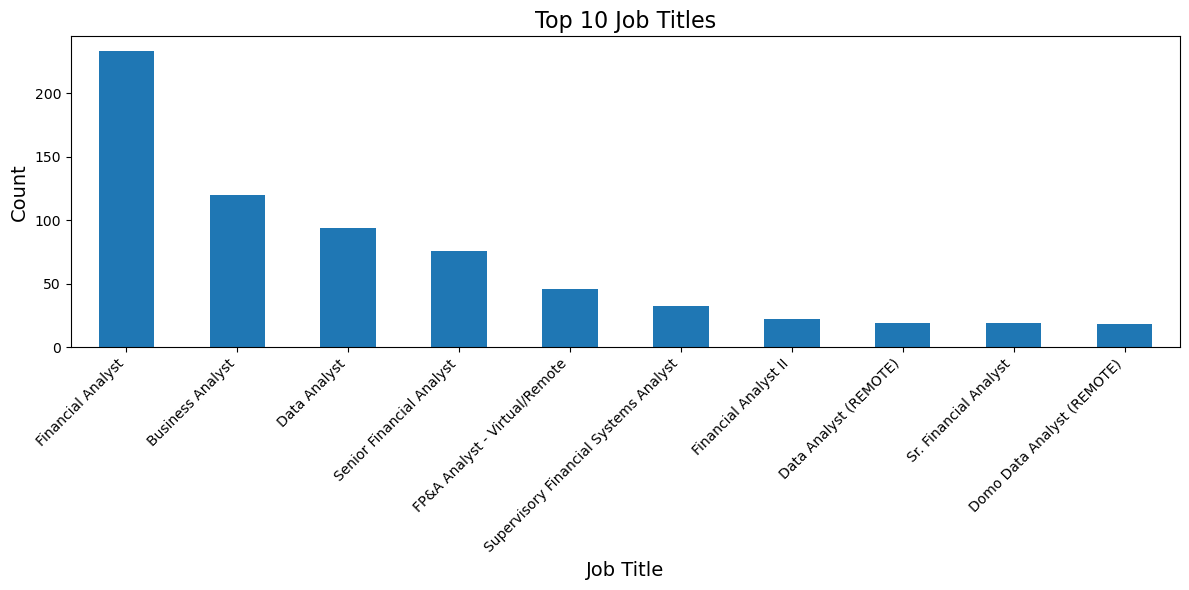

In [24]:
title_counts = df['title'].value_counts()

top_10_titles = title_counts.head(10)

# Create a bar plot
plt.figure(figsize=(12, 6))
top_10_titles.plot(kind='bar')

# Add title and labels
plt.title('Top 10 Job Titles', fontsize=16)
plt.xlabel('Job Title', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()

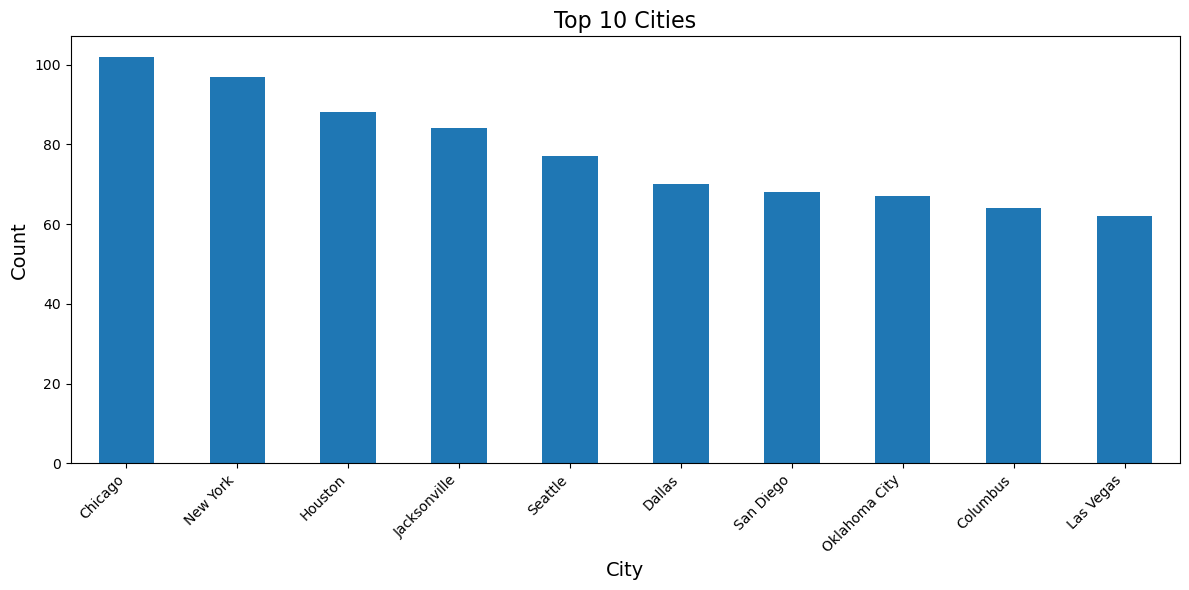

In [27]:
import numpy as np
# Check if 'location' column contains only strings
if df['location'].dtype == object:
    # Extract the city names from the 'location' column
    cities = df['location'].apply(lambda x: str(x).split(',')[0].strip())
else:
    # If 'location' column contains non-string values, convert to string first
    cities = df['location'].astype(str).apply(lambda x: x.split(',')[0].strip())

# Replace any empty strings with NaN
cities = cities.replace('', np.nan)

# Drop any rows with NaN in the 'cities' column
cities = cities.dropna()

# Get the value counts for the cities
city_counts = cities.value_counts()

# Get the top 10 cities
top_10_cities = city_counts.head(10)

# Create a bar plot
plt.figure(figsize=(12, 6))
top_10_cities.plot(kind='bar')

# Add title and labels
plt.title('Top 10 Cities', fontsize=16)
plt.xlabel('City', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()

In [36]:
!pip3 install -U python-jobspy

In [41]:
from jobspy import scrape_jobs
import pandas as pd

class JobScraper:
    def __init__(self, search_term, cities, country_indeed='USA', description_format='markdown', results_wanted=2000):
        self.search_term = search_term
        self.cities = cities
        self.country_indeed = country_indeed
        self.description_format = description_format
        self.results_wanted = results_wanted
        self.job_data = []

    def scrape_jobs(self):
        for city in self.cities:
            print(f"Scraping jobs for {city}...")
            jobs = scrape_jobs(
                site_name=["indeed", "linkedin", "zip_recruiter", "glassdoor"],
                search_term=self.search_term,
                location=city,
                results_wanted=self.results_wanted,
                country_indeed=self.country_indeed,
                description_format=self.description_format,
                description=True  # Include job descriptions
            )

            print(f"Found {len(jobs)} jobs for {city}")

            # Extract the desired columns from the jobs DataFrame
            self.job_data.extend(jobs[['title', 'company', 'location', 'description']].to_dict('records'))

    def create_dataframe(self):
        self.jobs_df = pd.DataFrame(self.job_data)
        return self.jobs_df

    def save_dataframe(self, output_file):
        self.jobs_df.to_csv(output_file, index=False)
        print(f"Job data saved to {output_file}")

# List of 72 cities with the highest number of jobs
cities = [
    "New York City, NY", "Los Angeles, CA", "Chicago, IL", "Houston, TX",
    "Phoenix, AZ", "Philadelphia, PA", "San Antonio, TX", "San Diego, CA",
    "Dallas, TX", "San Jose, CA", "Austin, TX", "Jacksonville, FL",
    "Fort Worth, TX", "Columbus, OH", "Charlotte, NC", "Detroit, MI",
    "El Paso, TX", "Memphis, TN", "Denver, CO", "Washington, DC",
    "Boston, MA", "Nashville, TN", "Seattle, WA", "Baltimore, MD",
    "Louisville, KY", "Portland, OR", "Oklahoma City, OK", "Milwaukee, WI",
    "Las Vegas, NV", "Albuquerque, NM", "Tucson, AZ", "Fresno, CA",
    "Sacramento, CA", "Long Beach, CA", "Kansas City, MO", "Mesa, AZ",
    "Virginia Beach, VA", "Atlanta, GA", "Colorado Springs, CO", "Omaha, NE",
    "Raleigh, NC", "Miami, FL", "Oakland, CA", "Minneapolis, MN",
    "Tulsa, OK", "Cleveland, OH", "Wichita, KS", "Arlington, TX",
    "New Orleans, LA", "Bakersfield, CA", "Tampa, FL", "Honolulu, HI",
    "Aurora, CO", "Anaheim, CA", "Santa Ana, CA", "St. Louis, MO",
    "Riverside, CA", "Corpus Christi, TX", "Lexington, KY", "Pittsburgh, PA",
    "Anchorage, AK", "Stockton, CA", "Cincinnati, OH", "St. Paul, MN",
    "Toledo, OH", "Greensboro, NC", "Newark, NJ", "Plano, TX",
    "Henderson, NV", "Lincoln, NE", "Buffalo, NY", "Jersey City, NJ"
]

# Create an instance of the JobScraper class
job_scraper = JobScraper(search_term="data scientist", cities=cities)

# Scrape jobs
job_scraper.scrape_jobs()

# Create a DataFrame from the job data
jobs_df = job_scraper.create_dataframe()

# Save the DataFrame to a CSV file
job_scraper.save_dataframe('job_data.csv')

2024-03-28 18:41:41,554 - JobSpy - INFO - Indeed search page: 1
2024-03-28 18:41:41,556 - JobSpy - INFO - LinkedIn search page: 1
2024-03-28 18:41:41,757 - JobSpy - INFO - ZipRecruiter search page: 1
2024-03-28 18:41:42,320 - JobSpy - INFO - Indeed search page: 2
2024-03-28 18:41:43,110 - JobSpy - INFO - Glassdoor search page: 1
2024-03-28 18:41:43,110 - JobSpy - INFO - Indeed search page: 3
2024-03-28 18:41:43,513 - JobSpy - INFO - Indeed search page: 4
2024-03-28 18:41:44,123 - JobSpy - INFO - Indeed found no jobs on page: 4
2024-03-28 18:41:44,123 - JobSpy - INFO - Indeed finished scraping
2024-03-28 18:41:44,400 - JobSpy - INFO - Glassdoor search page: 2
2024-03-28 18:41:45,502 - JobSpy - INFO - Glassdoor search page: 3
2024-03-28 18:41:47,059 - JobSpy - INFO - Glassdoor search page: 4
2024-03-28 18:41:47,331 - JobSpy - INFO - ZipRecruiter search page: 2
2024-03-28 18:41:48,158 - JobSpy - INFO - Glassdoor search page: 5
2024-03-28 18:41:49,353 - JobSpy - INFO - Glassdoor search pag

Found 523 jobs
          site                                            job_url  \
219  glassdoor  https://www.glassdoor.com/job-listing/j?jl=100...   
235  glassdoor  https://www.glassdoor.com/job-listing/j?jl=100...   
244  glassdoor  https://www.glassdoor.com/job-listing/j?jl=100...   
245  glassdoor  https://www.glassdoor.com/job-listing/j?jl=100...   
264  glassdoor  https://www.glassdoor.com/job-listing/j?jl=100...   

    job_url_direct                                            title  \
219            NaN                                   Data Scientist   
235            NaN                          Manager Data Science/AI   
244            NaN                                    Data Engineer   
245            NaN                       Entry Level Data Scientist   
264            NaN  Sr. Data Scientist (GenAI/LLMs & AWS Sagemaker)   

                company    location job_type date_posted interval  min_amount  \
219            7-Eleven  Irving, TX      NaN  2024-03-28      

In [42]:
print(jobs.columns)

Index(['site', 'job_url', 'job_url_direct', 'title', 'company', 'location',
       'job_type', 'date_posted', 'interval', 'min_amount', 'max_amount',
       'currency', 'is_remote', 'emails', 'description', 'company_url',
       'company_url_direct', 'company_addresses', 'company_industry',
       'company_num_employees', 'company_revenue', 'company_description',
       'logo_photo_url', 'banner_photo_url', 'ceo_name', 'ceo_photo_url'],
      dtype='object')


In [46]:
jobs.description[20]

'**Data Scientist Mid**\n\n *Direct Hire 1099 or W2 only.*\n\n*The client is not offering subcontracting for this position.*\n\n*This role is onsite in Irving, TX.*\n\n*[10652]*\n\n  \n\nWe are looking for a dynamic Junior- Data Scientist who is proficient with Background that covers multiple aspects of data science including mathematics, statistics, engineering, design of experiments, multi-platform coding including cloud platforms, and machine learning. Degrees from more than one area preferred. You will ensure that the platform is robust and easy to maintain. You will coordinate with the rest of the team working on different layers of the infrastructure. Therefore, a commitment to collaborative problem-solving, sophisticated design, and quality product is important.\n\n  \n\nRequirements:  \n\n  \n\nSkills & Responsibilities (Must Have)\n\n  \n\n* 5-8 years of hands-on experience in building, training and deploying end-to-end ML and statistical models in production environments.\n* 